In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [24]:
df = pd.read_csv("./data/팬오션_시세.csv", encoding='euc-kr').sort_values("일자").reset_index(drop=True)
df_gong = pd.read_csv("./data/팬오션_공매도.csv", encoding='euc-kr')
df_gong2 = pd.read_csv("./data/팬오션_공매도2.csv", encoding='euc-kr')

In [25]:
gong = pd.concat([df_gong, df_gong2]).sort_values("일자").reset_index(drop = True)

In [26]:
total = pd.merge(df, gong, on = "일자").sort_values('일자').reset_index(drop=True)

In [27]:
price = list(total["시가"][30:])

In [28]:
ddd = pd.read_csv("./data/팬오션_시세2.csv", encoding='euc-kr')

In [29]:
for i in ddd["시가"][:30]:
    price.append(i)

In [30]:
total["price"] = price

In [31]:
foreign = pd.read_csv("./data/팬오션_외국인.csv", encoding='euc-kr')
foreign2 = pd.read_csv("./data/팬오션_외국인2.csv", encoding='euc-kr')

In [32]:
total["외국인 지분율"] = pd.concat([foreign, foreign2]).sort_values("일자").reset_index(drop = True)["외국인 지분율"]

In [33]:
total = total.drop(total[["대비", "종가", "고가", "저가", '공매도 수량_순보유잔고수량', "공매도 수량_거래량_업틱룰적용", "공매도 금액_거래대금_업틱룰적용", "상장주식수", "시가총액", "거래대금", "공매도 수량_거래량_전체", "공매도 수량_거래량_업틱룰예외", "공매도 금액_거래대금_전체", "공매도 금액_거래대금_업틱룰예외"]], axis = 1)

In [34]:
x = total.drop(["일자", "price"], axis = 1)
y = total["price"]

In [35]:
knr = KNeighborsRegressor()

mm = MinMaxScaler()
scaled_x = mm.fit_transform(x)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size = 0.2, random_state = 0)

In [37]:
knr.fit(x_train, y_train)
print(knr.score(x_train, y_train))
print(knr.score(x_test, y_test))
y_pred= knr.predict(x_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

0.9172343494138931
0.7701880339276549


502.43562852450145

In [38]:
total

,일자,등락률,시가,거래량,공매도 금액_순보유잔고금액,price,외국인 지분율
0,2021/01/04,6.97,5150,12120901,297331530,5200,11.28
1,2021/01/05,1.12,5300,16012791,300653670,5180,11.51
2,2021/01/06,-5.71,5480,8510216,593592320,5010,11.41
3,2021/01/07,-0.78,5200,7363429,281274520,5370,11.58
4,2021/01/08,-1.67,5120,5112844,276568155,5660,11.58
...,...,...,...,...,...,...,...
734,2023/12/21,-3.50,4145,19755319,264850040,3730,12.17
735,2023/12/22,-3.37,3850,14611883,255930220,3655,12.31
736,2023/12/26,-0.80,3695,7771962,253945800,3695,12.45
737,2023/12/27,-2.03,3745,6019799,248896125,3600,12.54


<Axes: >

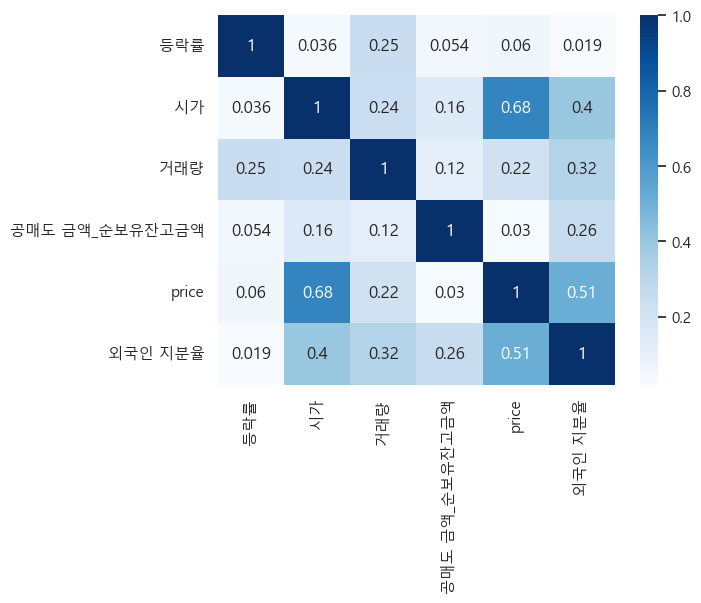

In [39]:
plt.rc("font", family = "Malgun Gothic")

sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')
corr_matrix = total.drop("일자", axis = 1).corr()
sns.heatmap(np.abs(corr_matrix), annot=True, cmap = "Blues")

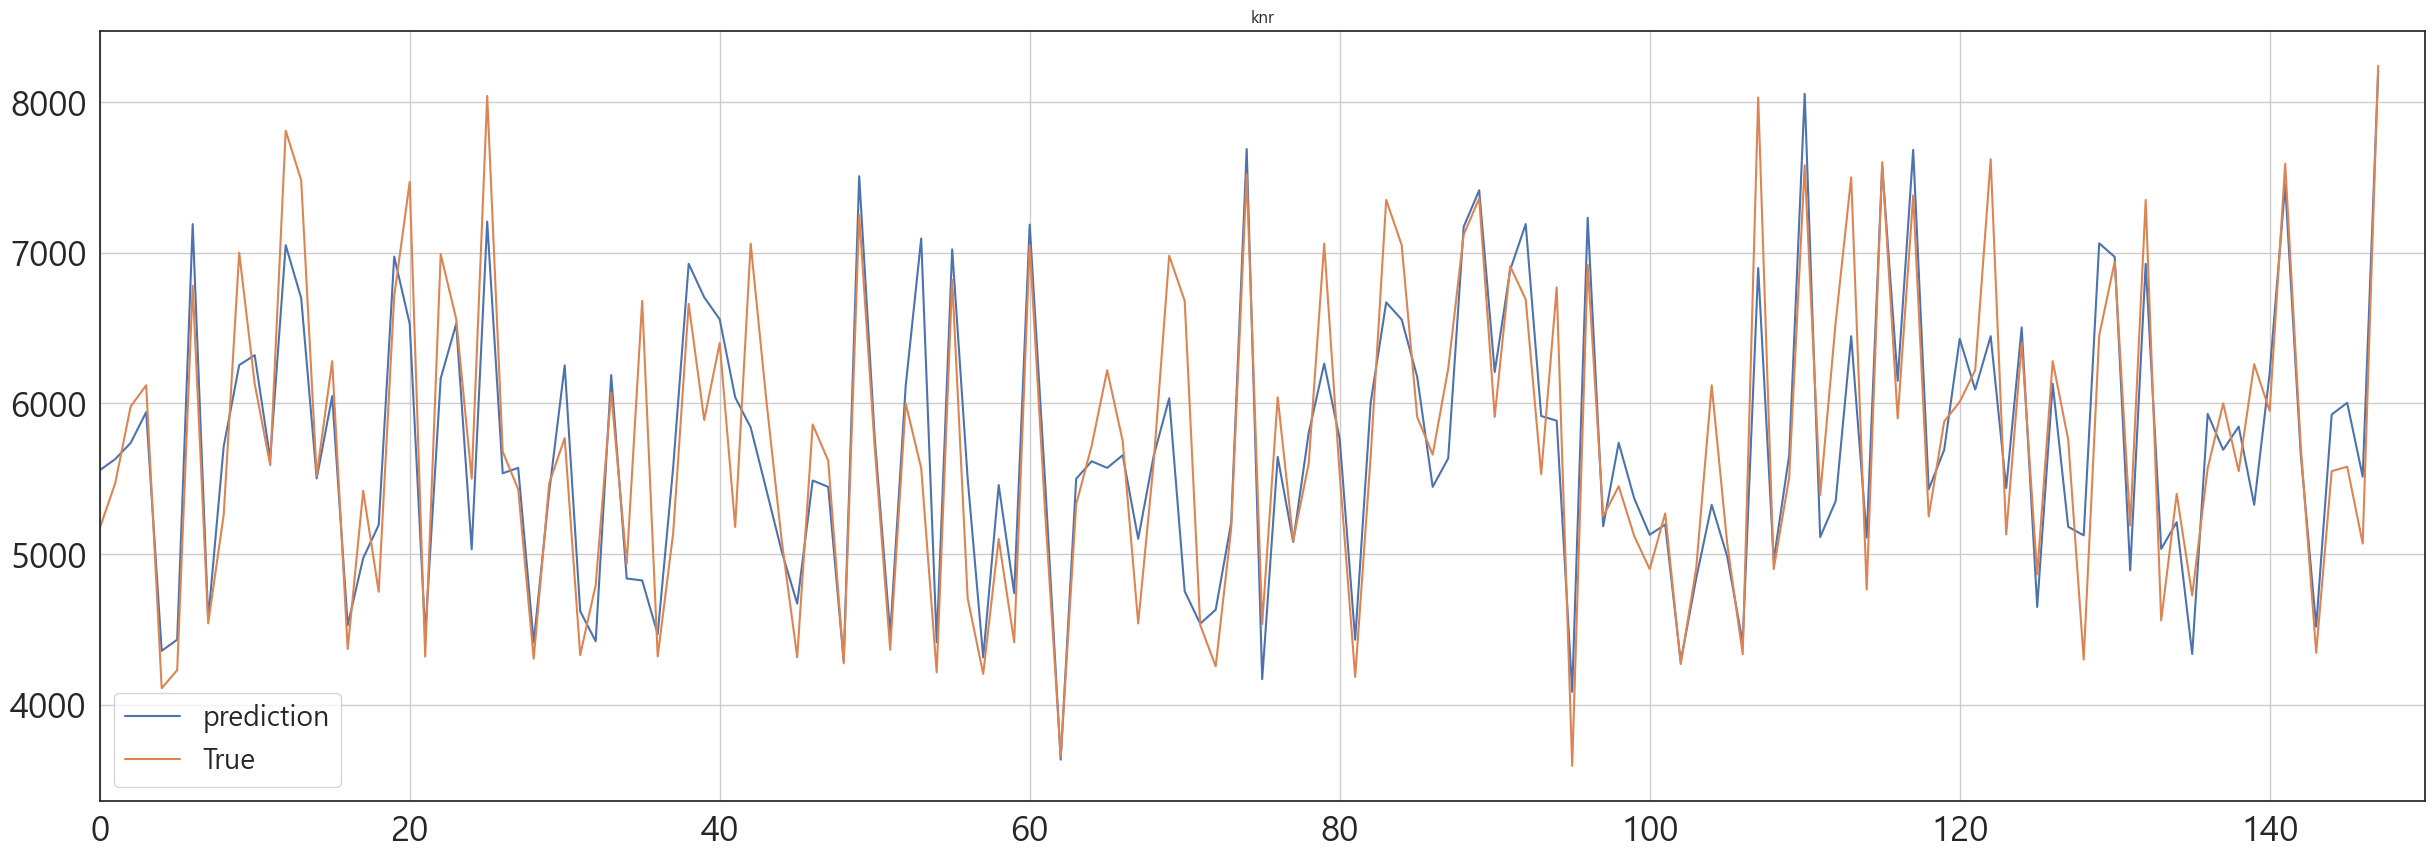

In [40]:
# test데이터 시각화
x_axis = np.arange(0, len(y_test))

plt.figure(figsize = (30,10))
plt.xlim(0, 150)
plt.title("knr")
plt.plot(x_axis ,y_pred, label = "prediction")
plt.plot(x_axis, y_test, label = "True") 
plt.legend(fontsize = 20)
plt.tick_params(axis = "x",labelsize = 25)
plt.tick_params(axis = "y",labelsize = 25)
plt.grid(True)

plt.show()

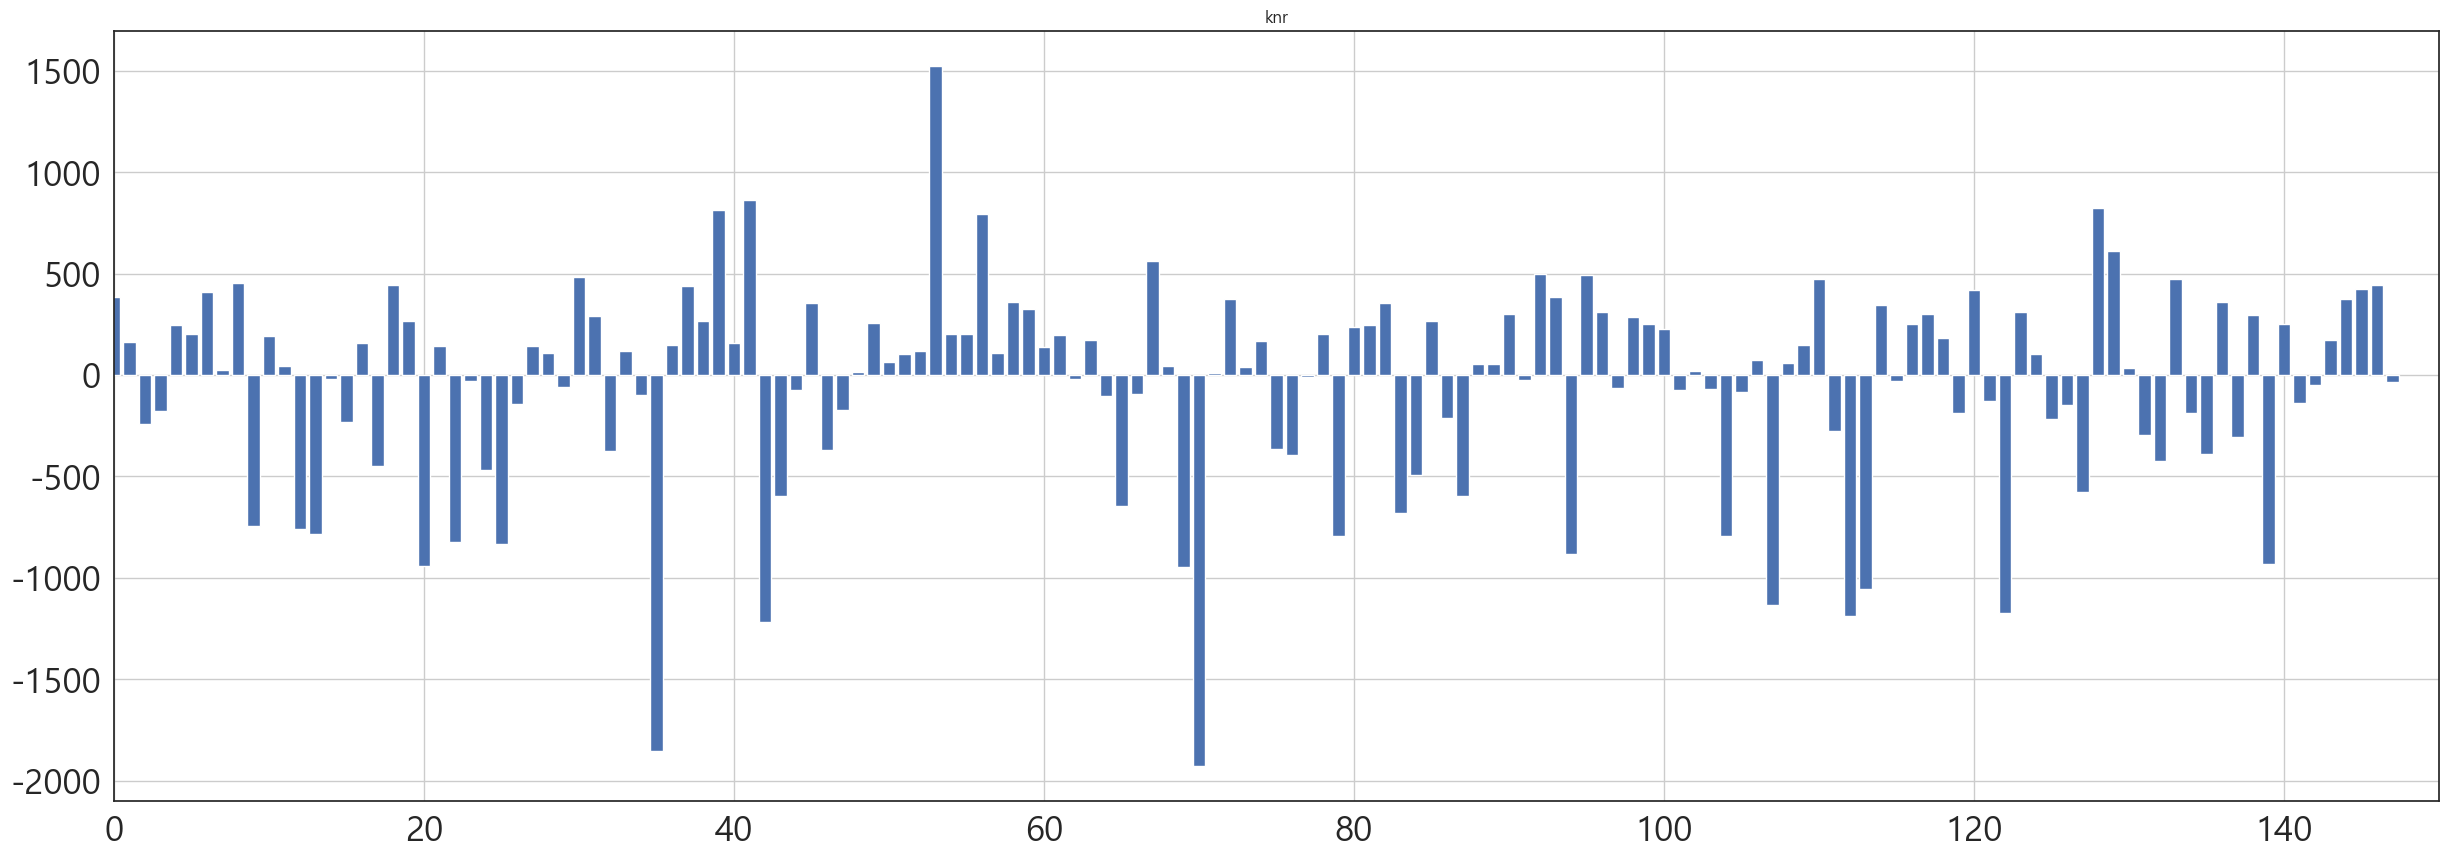

In [41]:
# 테스트 답안과 예측 답안의 차이를 바그래프로 표현

plt.figure(figsize = (30,10))

plt.xlim(0, 150)
plt.title("knr")
plt.bar(x_axis, y_pred - y_test)

plt.tick_params(axis = "x",labelsize = 25)
plt.tick_params(axis = "y",labelsize = 25)
plt.grid(True)

plt.show()

In [42]:
up_down = []
for i in total.index:
    if total["시가"][i] < total["price"][i]:
        up_down.append(1)
    else:
        up_down.append(0)
        
total["up_down"] = up_down

In [43]:
x_2 = total.drop(["price", "일자","up_down"], axis = 1)
y_2 = total["up_down"]
scaled_x_2 = mm.fit_transform(x_2)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(scaled_x_2, y_2, test_size = 0.2, random_state = 0)

In [44]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 0)
rf.fit(x_train_2, y_train_2)
print(rf.score(x_train_2, y_train_2))
print(rf.score(x_test_2, y_test_2))
y_pred_2 = rf.predict(x_test_2)
print(len(y_test), (y_test_2 == y_pred_2).sum())

1.0
0.8378378378378378
148 124


In [45]:
y_pred_2

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)